# Experiment: Train Logisitic Regression Model with TF-IDF Features

## Confirm Environment

In [1]:
!conda info


     active environment : northeastern
    active env location : /home/curtis/anaconda3/envs/northeastern
            shell level : 2
       user config file : /home/curtis/.condarc
 populated config files : /home/curtis/anaconda3/.condarc
          conda version : 24.9.2
    conda-build version : 24.9.0
         python version : 3.12.7.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=skylake
                          __conda=24.9.2=0
                          __glibc=2.39=0
                          __linux=6.6.87.2=0
                          __unix=0=0
       base environment : /home/curtis/anaconda3  (writable)
      conda av data dir : /home/curtis/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://r

## Setup and Imports

In [2]:
from emolex.preprocessing import load_mental_health_sentiment_dataset, clean_text, encode_sentiment_labels, split_data, tfidf_text_vectorization
from emolex.ml_models import train_tfidf_lr_model
from emolex.evaluation import generate_confusion_matrix, generate_classification_report

2025-07-02 15:28:02.389592: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 15:28:02.421652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751484482.448426   46601 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751484482.456171   46601 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751484482.476313   46601 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Load Data

In [3]:
df = load_mental_health_sentiment_dataset()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51093 entries, 0 to 51092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    51093 non-null  object
 1   label   51093 non-null  object
dtypes: object(2)
memory usage: 798.5+ KB


,text,label
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


## Clean Data

In [4]:
print(f"\n--- Cleaning Text ---")
df['clean_text'] = df["text"].apply(clean_text)
print("Text cleaning complete. Sample cleaned text:")
print("\n", df[["text", "clean_text"]].sample(5))


--- Cleaning Text ---
Text cleaning complete. Sample cleaned text:

                                                     text  \
26927  do i need a constant flow of helium or do i ju...   
26707  i wanted to start working out but i could not ...   
40674    ase depression ke go nna ka motseng wa batswadi   
45849  How do you control impulse buying? I am depres...   
44712                          at work plus im sick blah   

                                              clean_text  
26927  need constant flow helium fill bag seal using ...  
26707  wanted start working could move day getting fa...  
40674    ase depression ke go nna ka motseng wa batswadi  
45849  control impulse buying depressed right remembe...  
44712                             work plus im sick blah  


## Encode Labels

In [5]:
print(f"\n--- Encoding Labels ---")
df, encoder = encode_sentiment_labels(df)
print("Label encoding complete. Sample encoded labels:")
print("\n", df[['label', 'label_encoded']].sample(5))


--- Encoding Labels ---
Label Encoding Map: {'Anxiety': 0, 'Bipolar': 1, 'Depression': 2, 'Normal': 3, 'Personality disorder': 4, 'Stress': 5, 'Suicidal': 6}
Label encoding complete. Sample encoded labels:

             label  label_encoded
37312    Suicidal              6
46788  Depression              2
41066  Depression              2
1482       Normal              3
28193      Normal              3


## Train-Test Split

In [6]:
print("\n--- Perform Train-Test Split ---")
X_train_raw, X_test_raw, y_train, y_test = split_data(df) 
print(f"Train set size: {len(X_train_raw)} samples")
print(f"Test set size: {len(X_test_raw)} samples")


--- Perform Train-Test Split ---
Train set size: 40874 samples
Test set size: 10219 samples


## Vectorization 

In [7]:
print("\n--- Compute TF-IDF Vectorization ---")
X_train_tfidf, X_test_tfidf, _ = tfidf_text_vectorization(X_train_raw, X_test_raw)


--- Compute TF-IDF Vectorization ---
Starting TF-IDF feature extraction with max_features=10000...
TF-IDF transformed X_train_tfidf shape: (40874, 10000)
TF-IDF transformed X_test_tfidf shape: (10219, 10000)


## Train Model

In [8]:
print("\n--- Train Model ---")
model = train_tfidf_lr_model(X_train_tfidf, y_train)


--- Train Model ---
Training Logistic Regression model...
Logistic Regression model training complete.


## Evaluate Model

In [9]:
print("\n--- Predict Test Classes ---")
y_pred = model.predict(X_test_tfidf)


--- Predict Test Classes ---



--- Generate Confusion Matrix ---


/mnt/c/grad_school/northeastern/ie7500/project/NLP_Project/src/emolex/evaluation.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


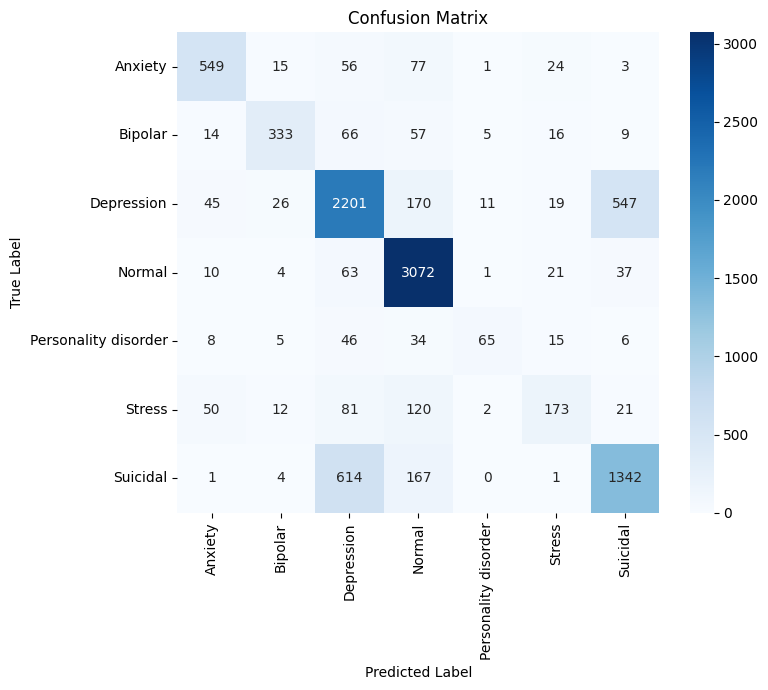

In [10]:
print("\n--- Generate Confusion Matrix ---")
fig, ax = generate_confusion_matrix(y_test, y_pred, class_labels=encoder.classes_)

In [11]:
encoder.classes_.tolist()

['Anxiety',
 'Bipolar',
 'Depression',
 'Normal',
 'Personality disorder',
 'Stress',
 'Suicidal']

In [12]:
print("\n--- Generate Classification Report ---")
generate_classification_report(y_test, y_pred, class_labels=encoder.classes_)


--- Generate Classification Report ---


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']